# Libraries

In [1]:
import matplotlib.cm as cm
import matplotlib.patheffects as pe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys

from matplotlib.colors import LogNorm,LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D
from PIL import Image
from scipy import ndimage,interpolate,optimize

# Import custom libraries for this notebook
indir='/Path/To/Repository/'
if indir+'Code' not in sys.path: sys.path.append(indir+'Code')
import CNT_Analysis_Functions as CNT_F

%load_ext autoreload
%autoreload 2
%matplotlib inline

# rcParams

In [2]:
plt.rcParams['lines.linewidth']=0.75
plt.rcParams['lines.color']='r'
plt.rcParams['image.cmap']='gist_gray'
plt.rcParams['font.size']=7
plt.rcParams['ytick.major.size']=2
plt.rcParams['xtick.major.size']=2
plt.rcParams['ytick.major.pad']=0.5
plt.rcParams['xtick.major.pad']=0.5
plt.rcParams['axes.labelpad']=1
plt.rcParams['figure.subplot.wspace']=0.3
plt.rcParams['pdf.fonttype']=42
plt.rcParams['ps.fonttype']=42
plt.rcParams['font.family']='sans-serif'
plt.rcParams['font.sans-serif']=['Arial'] 
plt.rcParams['mathtext.fontset']='custom'  
plt.rcParams['mathtext.rm']='Arial'      
plt.rcParams['mathtext.it']='Arial:italic' 
plt.rcParams['mathtext.bf']='Arial:bold' 

# vEEL Point Spectra

## Load Preprocessed Spectra

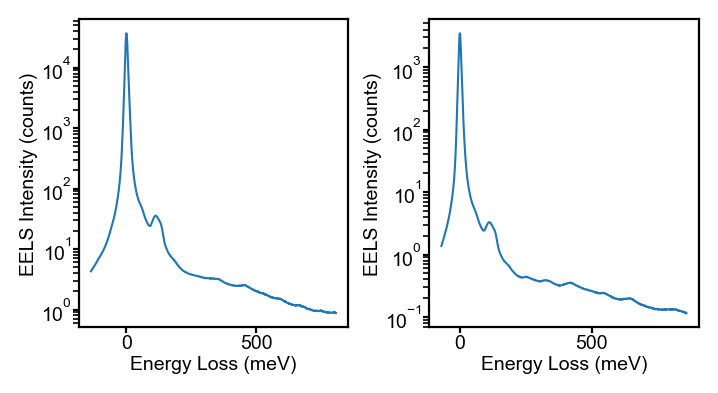

In [3]:
filename=indir+'Data/vEEL_Point_Spectra/FilledCNT_1pt4nm_RT'
vEELS_1pt4_E=np.load(filename+'_E.npy')
vEELS_1pt4_S=np.load(filename+'_S.npy')

filename=indir+'Data/vEEL_Point_Spectra/FilledCNT_2pt3nm_RT'
vEELS_2pt3_E=np.load(filename+'_E.npy')
vEELS_2pt3_S=np.load(filename+'_S.npy')

f,a=plt.subplots(1,2,dpi=200,figsize=(4,2))
plt.setp(a,xlabel='Energy Loss (meV)',ylabel='EELS Intensity (counts)')
a[0].plot(vEELS_1pt4_E*1000,vEELS_1pt4_S)
a[0].set_yscale('log')
a[1].plot(vEELS_2pt3_E*1000,vEELS_2pt3_S)
a[1].set_yscale('log')

## Fit Background to Extract O-H Peak

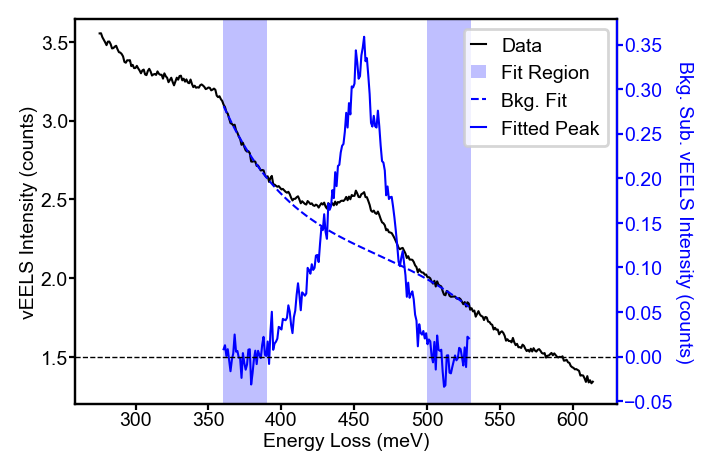

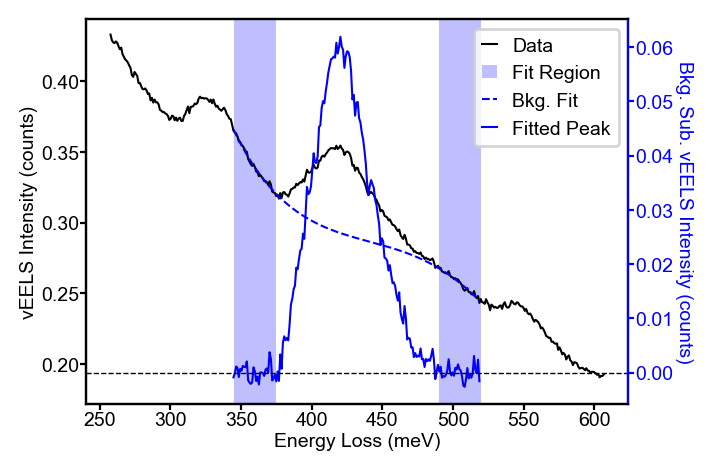

In [4]:
# Define Fit Regions (1.4 nm CNT)
R1_1pt4=360,390
R2_1pt4=500,530

# Perform Fit
vEELS_1pt4_E_f,vEELS_1pt4_S_f=CNT_F.GetExponentialFit_2R(vEELS_1pt4_E*1000,vEELS_1pt4_S,3,R1_1pt4,R2_1pt4)

# Define Fit Regions (2.3 nm CNT)
R1_2pt3=345,375
R2_2pt3=490,520

# Perform Fit
vEELS_2pt3_E_f,vEELS_2pt3_S_f=CNT_F.GetExponentialFit_2R(vEELS_2pt3_E*1000,vEELS_2pt3_S,3,R1_2pt3,R2_2pt3)


# DFT MD vDOS

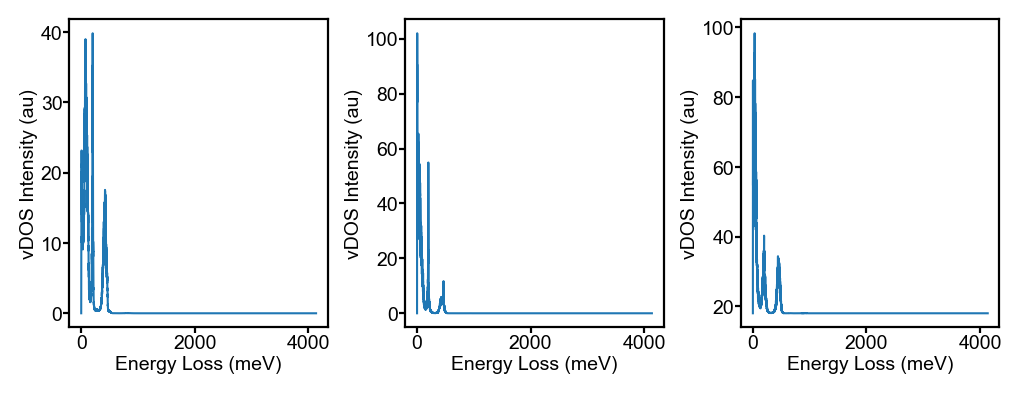

In [5]:
# Load vDOS from MD Simulations
filename=indir+'Data/DFT_vDOS/bulk_300K_1pt0_vDOS.csv'
vDOS_bulk_df=pd.read_csv(filename)
vDOS_bulk_keys=vDOS_bulk_df.keys()

filename=indir+'Data/DFT_vDOS/rCNT_300K_0pt5_vDOS.csv'
vDOS_rCNT_df=pd.read_csv(filename)
vDOS_rCNT_keys=vDOS_rCNT_df.keys()

filename=indir+'Data/DFT_vDOS/vCNT_AllT_0pt5_vDOS.csv'
vDOS_vCNT_df=pd.read_csv(filename)
vDOS_vCNT_keys=vDOS_vCNT_df.keys()

vDOS_bulk_E,vDOS_bulk_S=vDOS_bulk_df[vDOS_bulk_keys[1]],vDOS_bulk_df[vDOS_bulk_keys[2]]
vDOS_rCNT_E,vDOS_rCNT_S=vDOS_rCNT_df[vDOS_rCNT_keys[1]],vDOS_rCNT_df[vDOS_rCNT_keys[2]]
vDOS_vCNT_E,vDOS_vCNT_S=vDOS_vCNT_df[vDOS_vCNT_keys[1]],vDOS_vCNT_df[vDOS_vCNT_keys[2]]

f,a=plt.subplots(1,3,dpi=200,figsize=(6,2))
plt.setp(a,xlabel='Energy Loss (meV)',ylabel='vDOS Intensity (au)')
a[0].plot(vDOS_bulk_E,vDOS_bulk_S)
a[1].plot(vDOS_rCNT_E,vDOS_rCNT_S)
a[2].plot(vDOS_vCNT_E,vDOS_vCNT_S)

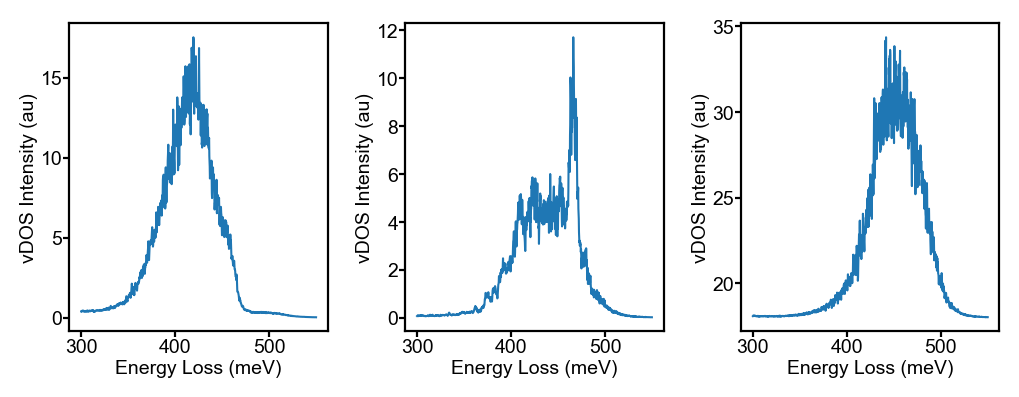

In [6]:
# Cut down vDOS to O-H stretch regime
en_lo=300; en_hi=550

i1,i2=CNT_F.Get_i(vDOS_bulk_E,en_lo),CNT_F.Get_i(vDOS_bulk_E,en_hi)
vDOS_bulk_E=vDOS_bulk_E[i1:i2]; vDOS_bulk_S=vDOS_bulk_S[i1:i2]

i1,i2=CNT_F.Get_i(vDOS_rCNT_E,en_lo),CNT_F.Get_i(vDOS_rCNT_E,en_hi)
vDOS_rCNT_E=vDOS_rCNT_E[i1:i2]; vDOS_rCNT_S=vDOS_rCNT_S[i1:i2]

i1,i2=CNT_F.Get_i(vDOS_vCNT_E,en_lo),CNT_F.Get_i(vDOS_vCNT_E,en_hi)
vDOS_vCNT_E=vDOS_vCNT_E[i1:i2]; vDOS_vCNT_S=vDOS_vCNT_S[i1:i2]

f,a=plt.subplots(1,3,dpi=200,figsize=(6,2))
plt.setp(a,xlabel='Energy Loss (meV)',ylabel='vDOS Intensity (au)')
a[0].plot(vDOS_bulk_E,vDOS_bulk_S)
a[1].plot(vDOS_rCNT_E,vDOS_rCNT_S)
a[2].plot(vDOS_vCNT_E,vDOS_vCNT_S)

# DFT MD Snapshots

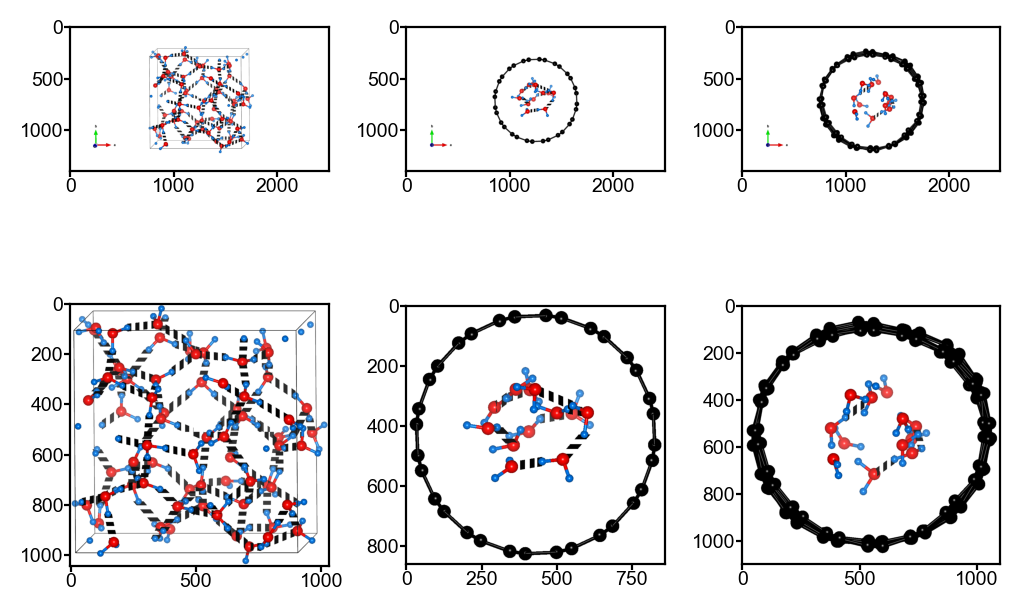

In [7]:
# Load TIF Image
# Note: .cif files handled in vesta and exported as raster image
filename=indir+'Data/DFT_Snapshots/bulk_300K_1pt0_snapshot.tif'
bulk_snapshot=Image.open(filename,'r')

filename=indir+'Data/DFT_Snapshots/rCNT_300K_0pt5_snapshot.tif'
rCNT_snapshot=Image.open(filename,'r')

filename=indir+'Data/DFT_Snapshots/vCNT_300K_0pt5_snapshot.tif'
vCNT_snapshot=Image.open(filename,'r')

# Plot Snapshots
f,a=plt.subplots(2,3,dpi=200,figsize=(6,4))
a[0,0].imshow(bulk_snapshot)
a[0,1].imshow(rCNT_snapshot)
a[0,2].imshow(vCNT_snapshot)

# Crop Raster Images
bulk_snapshot=bulk_snapshot.crop((750,185,1780,1230))
rCNT_snapshot=rCNT_snapshot.crop((822,285,1682,1145))
vCNT_snapshot=vCNT_snapshot.crop((700,170,1800,1270))

# Plot Cropped Snapshots
a[1,0].imshow(bulk_snapshot)
a[1,1].imshow(rCNT_snapshot)
a[1,2].imshow(vCNT_snapshot)

# DFT MD Heatmaps

## Load Preprocessed Heatmaps

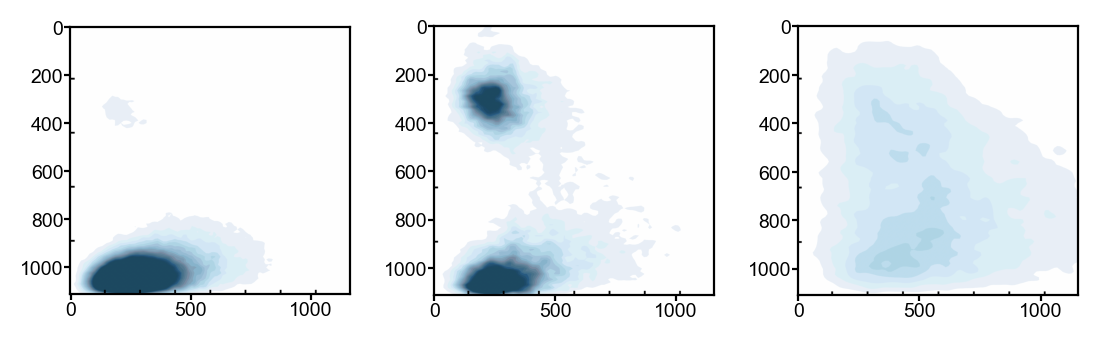

In [8]:
# Initial heatmap processing performed in Origin and exported for figures. 
# Here we load these files.

# Load Files
filename=indir+'Data/DFT_Heatmaps/Preprocessed/bulk_300K_1pt0_heatmap.png'
bulk_heatmap_pre=Image.open(filename,'r')
filename=indir+'Data/DFT_Heatmaps/Preprocessed/rCNT_300K_0pt5_heatmap.png'
rCNT_heatmap_pre=Image.open(filename,'r')
filename=indir+'Data/DFT_Heatmaps/Preprocessed/vCNT_300K_0pt5_heatmap.png'
vCNT_heatmap_pre=Image.open(filename,'r')

f,a=plt.subplots(1,3,dpi=200,figsize=(6.5,1.75))
a[0].imshow(bulk_heatmap_pre)
a[1].imshow(rCNT_heatmap_pre)
a[2].imshow(vCNT_heatmap_pre)

## Establish Extents for Preprocessed Heatmaps

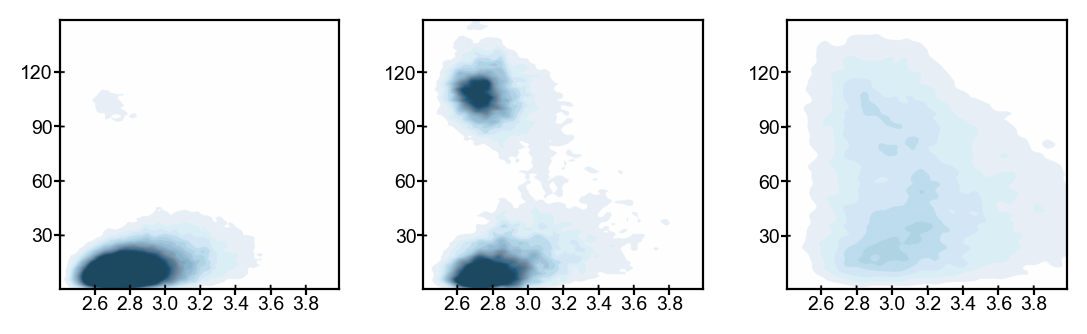

In [9]:
#Set extents based off of known tick marks from Origin preprocessing
bulk_heatmap_extent=[2.4,3.9915,0.15,148.75]
rCNT_heatmap_extent=[2.4075,3.9915,0.2,149]
vCNT_heatmap_extent=[2.4075,3.9875,0.5,149]

f,a=plt.subplots(1,3,dpi=200,figsize=(6.5,1.75))
plt.setp(a,xticks=[2.6,2.8,3.0,3.2,3.4,3.6,3.8],yticks=[30,60,90,120,150])
a[0].imshow(bulk_heatmap_pre,extent=bulk_heatmap_extent,aspect='auto')
a[1].imshow(rCNT_heatmap_pre,extent=rCNT_heatmap_extent,aspect='auto')
a[2].imshow(vCNT_heatmap_pre,extent=vCNT_heatmap_extent,aspect='auto')

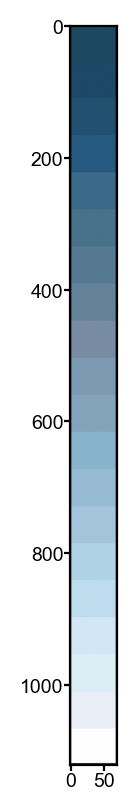

In [10]:
# Load colorbar from Origin plots
filename=indir+'Data/DFT_Heatmaps/Preprocessed/Origin_ColorBar.png'
heatmap_cb=Image.open(filename,'r')
heatmap_cb=heatmap_cb.crop((8,9,78,1131))

f,a=plt.subplots(1,1,dpi=200)
a.imshow(heatmap_cb)

## Process Heatmaps Directly

In [11]:
# Load MD output 
filename=indir+'Data/DFT_Heatmaps/bulk_300K_1pt0_heatmap.csv'
bulk_heatmap_df=pd.read_csv(filename)
bulk_heatmap_keys=bulk_heatmap_df.keys()

filename=indir+'Data/DFT_Heatmaps/rCNT_300K_0pt5_heatmap.csv'
rCNT_heatmap_df=pd.read_csv(filename)
rCNT_heatmap_keys=rCNT_heatmap_df.keys()

filename=indir+'Data/DFT_Heatmaps/vCNT_300K_0pt5_heatmap.csv'
vCNT_heatmap_df=pd.read_csv(filename)
vCNT_heatmap_keys=vCNT_heatmap_df.keys()

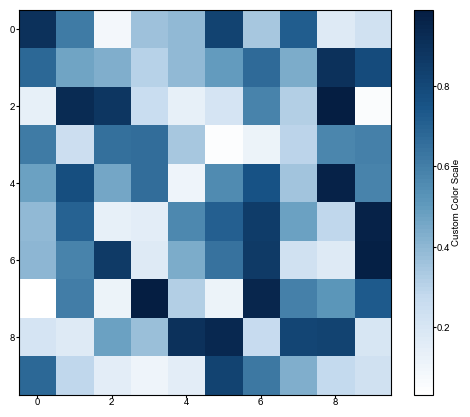

In [12]:
# Create Custom Color Map (modified version of cm.Blues

Heatmap_CM=LinearSegmentedColormap.from_list('list',[(1.,1. ,1.),
                                                        np.array(cm.Blues(0.25))[:3],
                                                        np.array(cm.Blues(0.50))[:3]*0.875,
                                                        np.array(cm.Blues(0.75))[:3]*0.75,
                                                        np.array(cm.Blues(1.00))[:3]*0.625],N=100)
data=np.random.rand(10,10)
plt.figure(figsize=(6,5))
plt.imshow(data,cmap=Heatmap_CM,aspect='auto')
plt.colorbar(label='Custom Color Scale')


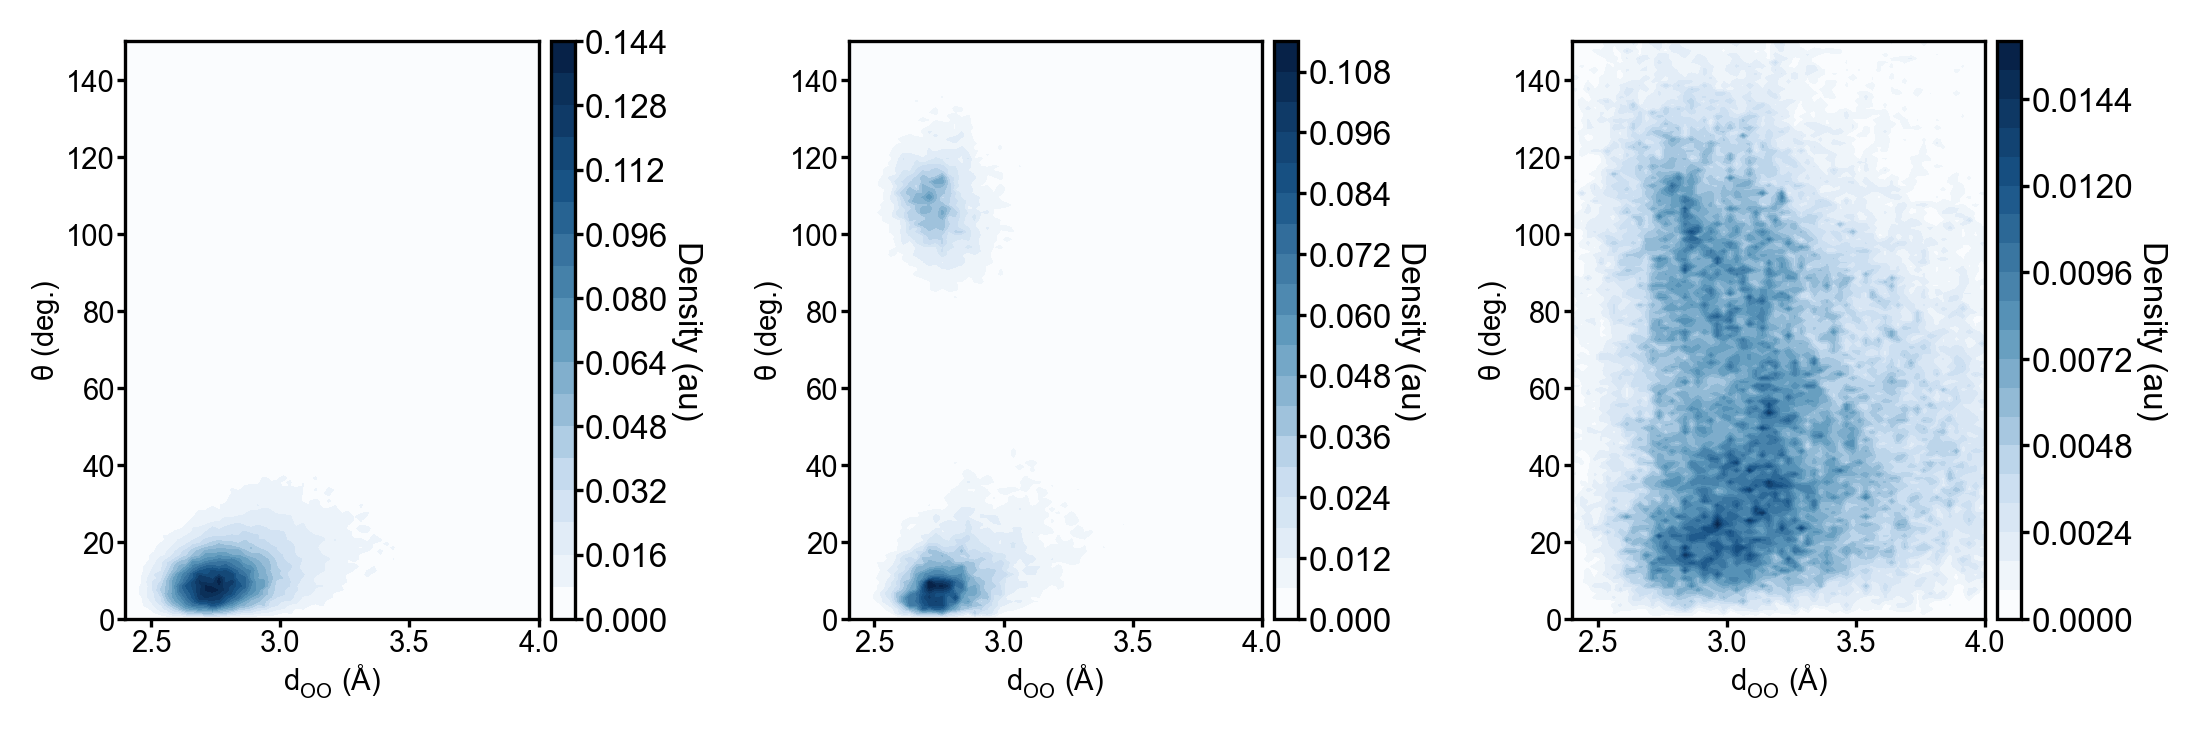

In [13]:
# Define Bins
d_bins=np.linspace(2.0,5.0,121)
t_bins=np.linspace(0,180,181)

# Compute the 2D Histogram
bulk_heatmap_alt,dOO_edges,theta_edges=np.histogram2d(bulk_heatmap_df[bulk_heatmap_keys[0]],
                                                          bulk_heatmap_df[bulk_heatmap_keys[1]],
                                                          bins=[d_bins,t_bins],density=True)

rCNT_heatmap_alt,dOO_edges,theta_edges=np.histogram2d(rCNT_heatmap_df[rCNT_heatmap_keys[0]],
                                                          rCNT_heatmap_df[rCNT_heatmap_keys[1]],
                                                          bins=[d_bins,t_bins],density=True)

vCNT_heatmap_alt,dOO_edges,theta_edges=np.histogram2d(vCNT_heatmap_df[vCNT_heatmap_keys[0]],
                                                          vCNT_heatmap_df[vCNT_heatmap_keys[1]],
                                                          bins=[d_bins,t_bins],density=True)

# Calculate Bin Centers for Plotting
dOO_centers =(dOO_edges[:-1]+dOO_edges[1:])/2.
theta_centers=(theta_edges[:-1]+theta_edges[1:])/2.

# Plot Processed Heat Maps (Native)
f,a=plt.subplots(1,3,dpi=300,figsize=(8,2.5))
plt.subplots_adjust(wspace=0.75)
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')

heatmap_kwargs={'cmap' : Heatmap_CM,'levels' : 20,'vmin' : 0}
cb_bulk=a[0].contourf(dOO_centers,theta_centers,bulk_heatmap_alt.T,**heatmap_kwargs)
CNT_F.AddColorBar(cb_bulk,a[0],f,w=0.01,label='Density (au)')

cb_rCNT=a[1].contourf(dOO_centers,theta_centers,rCNT_heatmap_alt.T,**heatmap_kwargs)
CNT_F.AddColorBar(cb_rCNT,a[1],f,w=0.01,label='Density (au)')

cb_vCNT=a[2].contourf(dOO_centers,theta_centers,vCNT_heatmap_alt.T,**heatmap_kwargs)
CNT_F.AddColorBar(cb_vCNT,a[2],f,w=0.01,label='Density (au)')

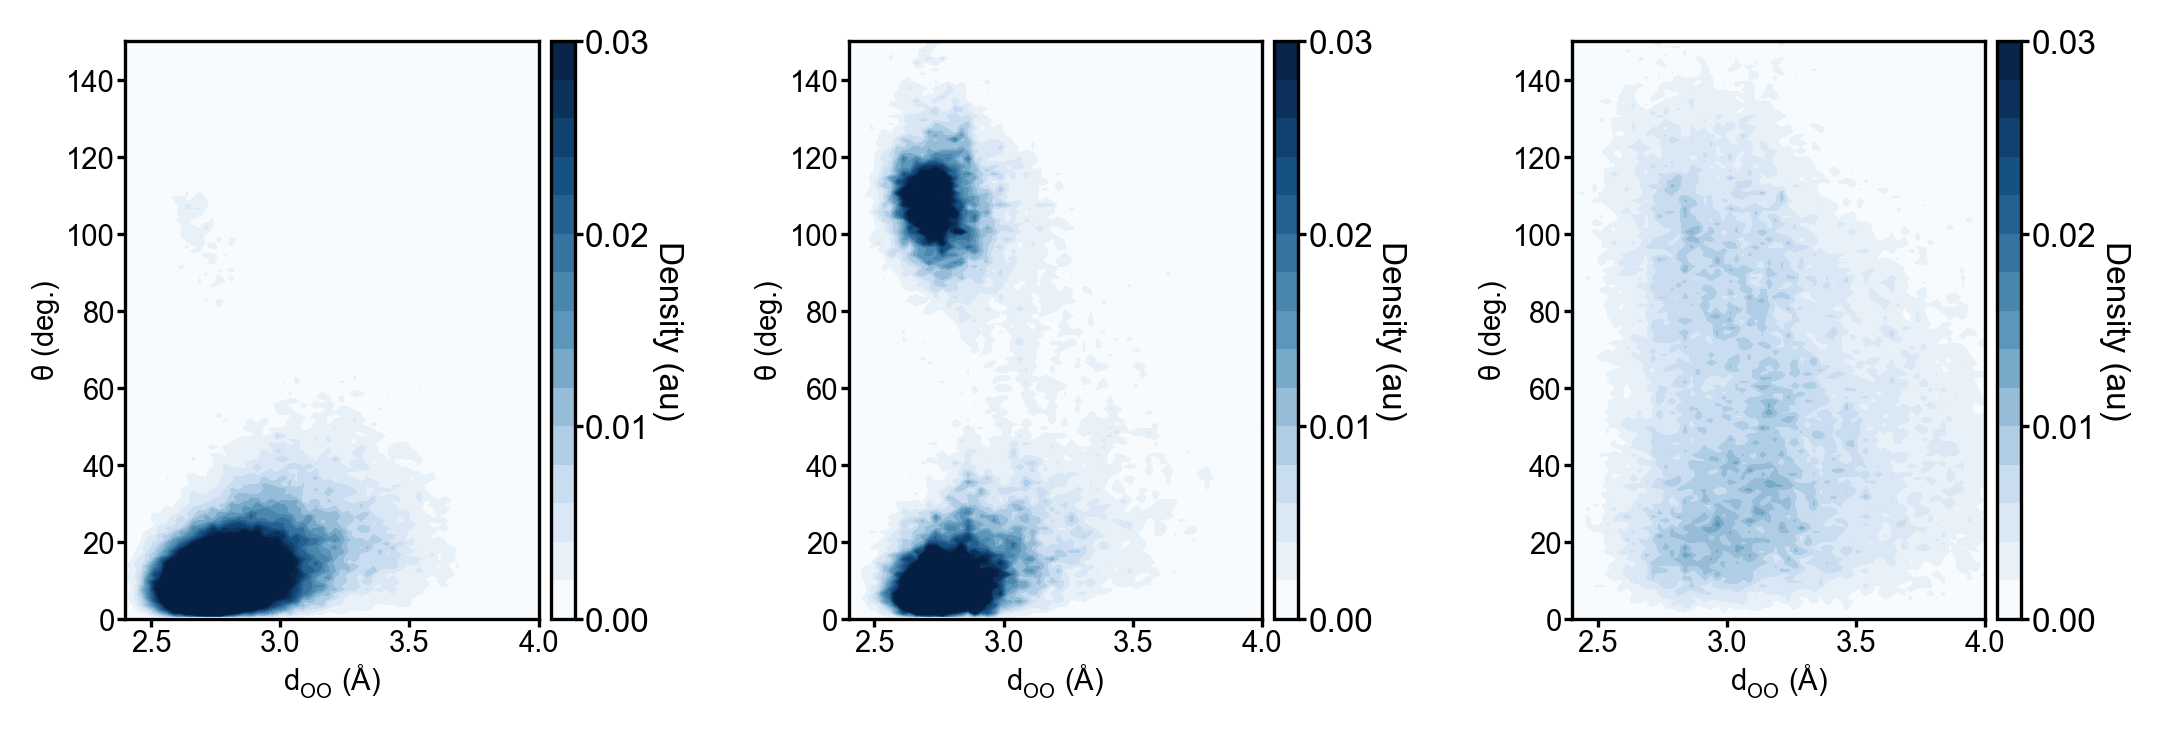

In [14]:
# Note: Since the three heatmaps have completely different intensity ranges we clip the intensities 
# at a level that allows us to see the dynamic range of all three heatmaps

max_value=0.03
heatmap_levels=np.linspace(0,max_value,16)

# Plot Processed Clipped Heat Maps (Quantiatively Comparable Colormap)
f,a=plt.subplots(1,3,dpi=300,figsize=(8,2.5))
plt.subplots_adjust(wspace=0.75)
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')

heatmap_kwargs={'cmap' : Heatmap_CM,'levels' : heatmap_levels,'linestyles' : 'dashed' }
cb_bulk=a[0].contourf(dOO_centers,theta_centers,bulk_heatmap_alt.T,extend='max',**heatmap_kwargs)
cb_rCNT=a[1].contourf(dOO_centers,theta_centers,rCNT_heatmap_alt.T,extend='max',**heatmap_kwargs)
cb_vCNT=a[2].contourf(dOO_centers,theta_centers,vCNT_heatmap_alt.T,**heatmap_kwargs)

cb_kwargs={'w' : 0.01,'tickvals' : heatmap_levels[::5],'label' : 'Density (au)'}
CNT_F.AddColorBar(cb_vCNT,a[0],f,**cb_kwargs)
CNT_F.AddColorBar(cb_vCNT,a[1],f,**cb_kwargs)
CNT_F.AddColorBar(cb_vCNT,a[2],f,**cb_kwargs)

# Note: Origin and Python have different normalization mechanisms so the y-axes are not identical even though the effect is the same

## Define H-Bonded Regime

Here,we take H-Bonded to be defined as regions where the H⋯O distance to be less than 2.4 Å and theta (the OH/OO bond angle) to be less than 30 degrees. While the H⋯O distance is not directly defined in the heatmap,we find that the O-H bond lengths are quite generally 0.98 Å with a small spready,so here we define a trigonometric function to determine the H⋯O distance from dOO and theta,and then set an upper limit to the function of theta=30 degrees

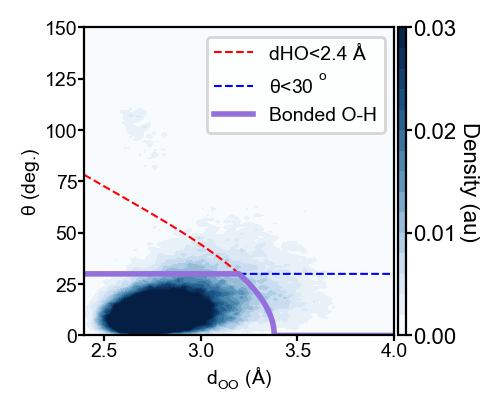

In [15]:
# Define Conditions Where HO < 2.4 as a function of dOO 

dOO_plot_ran=np.linspace(2,5,3001,endpoint=True) # Finer mesh for plotting
dOH_eff=0.98; dHO_thresh=2.4; dOO_HO_2pt4=dOH_eff+dHO_thresh

def HO_Thresh(dOO):
    dOO_calc=np.copy(dOO)
    dOO_calc[np.where(dOO > dOO_HO_2pt4)]=dOO_HO_2pt4
    theta_HO_thresh=180/np.pi*np.arccos((dOO_calc**2+dOH_eff**2 - dHO_thresh**2) / (2*dOH_eff*dOO_calc))
    return theta_HO_thresh

# Define Conditions Where theta<=30 and Where Calculation Undefined

dOO_30deg=dOO_plot_ran[np.argmin(np.abs(HO_Thresh(dOO_plot_ran)-30.))]

def HO_Thresh_Piecewise(dOO):
    HO_thresh=np.piecewise(dOO,[dOO < dOO_30deg,(dOO >= dOO_30deg) & (dOO < dOO_HO_2pt4),dOO >= dOO_HO_2pt4],
                     [lambda dOO: np.ones_like(dOO)*30,
                      lambda dOO: HO_Thresh(dOO),
                      lambda dOO: np.zeros_like(dOO),])
    return HO_thresh

f,a=plt.subplots(1,1,dpi=200,figsize=(2,2))
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')
a.contourf(dOO_centers,theta_centers,bulk_heatmap_alt.T,extend='max',**heatmap_kwargs)
cb_kwargs={'w' : 0.02,'tickvals' : heatmap_levels[::5],'label' : 'Density (au)'}
CNT_F.AddColorBar(cb_vCNT,a,f,**cb_kwargs)
a.plot(dOO_plot_ran,HO_Thresh(dOO_plot_ran),color='r',ls='--',label='dHO<2.4 Å')
a.plot(dOO_plot_ran,np.ones_like(dOO_plot_ran)*30,color='b',ls='--',label=r'$\mathrm{\theta}$<30 $^\mathrm{o}$')
a.plot(dOO_plot_ran,HO_Thresh_Piecewise(dOO_plot_ran),color='MediumPurple',label='Bonded O-H',lw=2)
a.legend()

## Calculate Percentage of Bonded O-H

Bulk Water: 82% Bonded


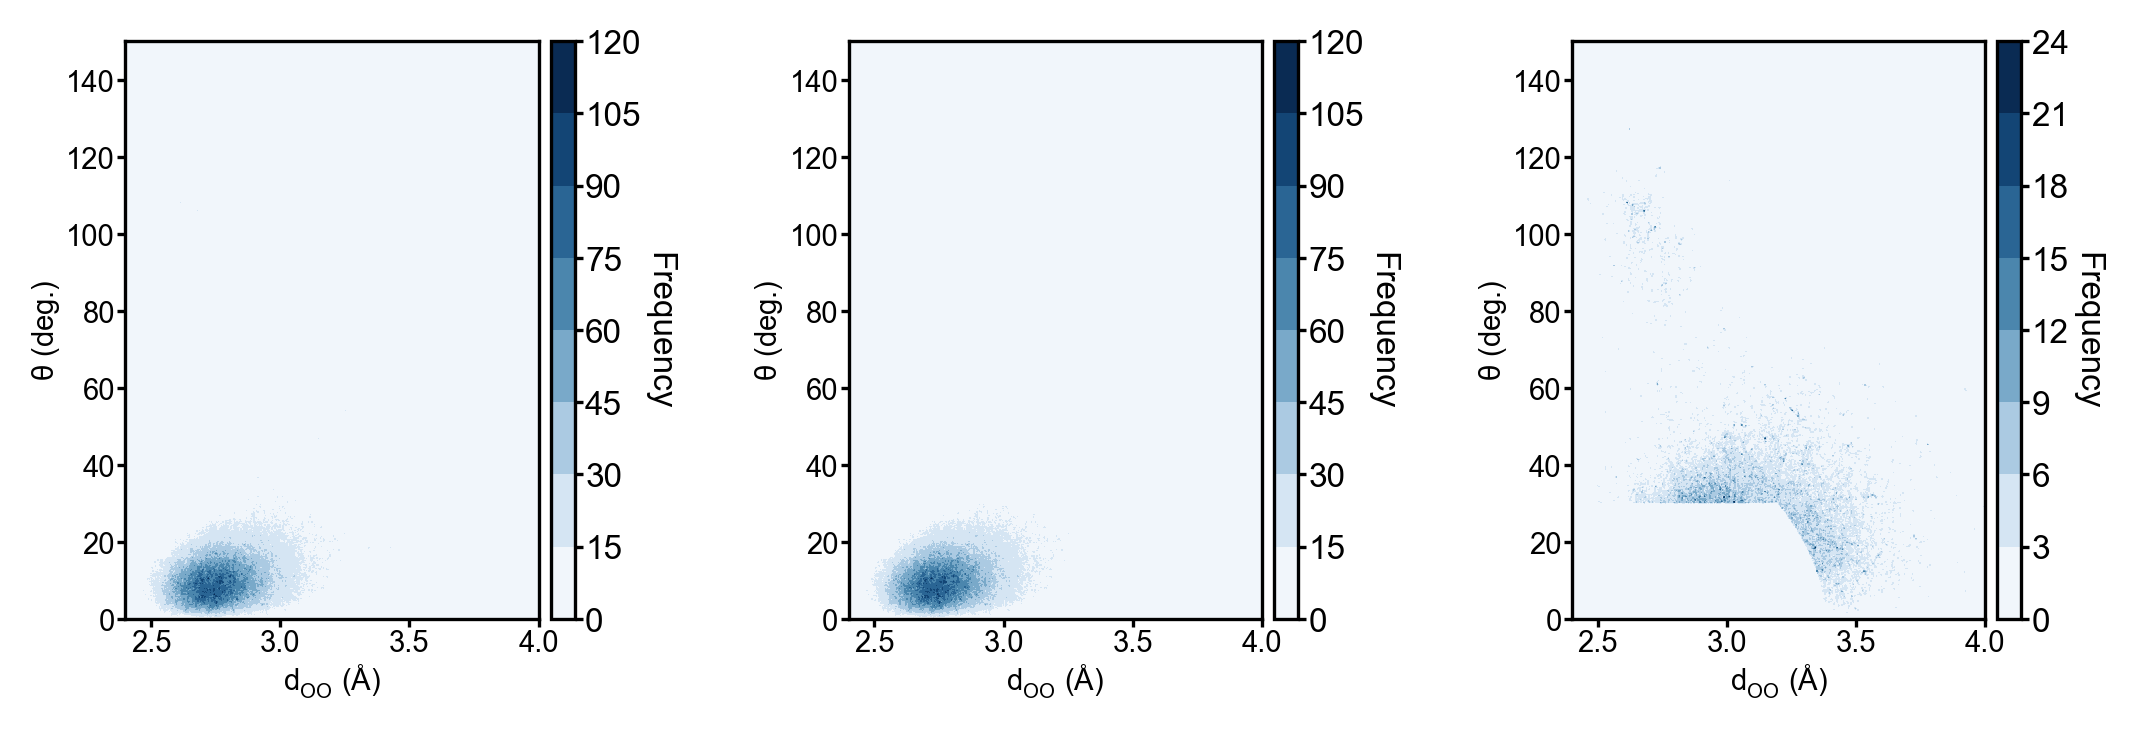

In [16]:
# Define Percentage Calculation Numbers for Bulk Water

d_bins_calc=np.linspace(2.0,5.0,1001)
t_bins_calc=np.linspace(0,180,1001)

bulk_heatmap_calc,dOO_edges_calc,theta_edges_calc=np.histogram2d(bulk_heatmap_df[bulk_heatmap_keys[0]],
                                                          bulk_heatmap_df[bulk_heatmap_keys[1]],
                                                          bins=[d_bins_calc,t_bins_calc],density=False)

dOO_centers_calc =(dOO_edges_calc[:-1]+dOO_edges_calc[1:])/2.
theta_centers_calc=(theta_edges_calc[:-1]+theta_edges_calc[1:])/2.

dd_calc,tt_calc=np.meshgrid(dOO_centers_calc,theta_centers_calc)
mask_calc=tt_calc<HO_Thresh_Piecewise(dOO_centers_calc)

f,a=plt.subplots(1,3,dpi=300,figsize=(8,2.5))
plt.subplots_adjust(wspace=0.75)
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')

heatmap_calc_kwargs={'cmap' : Heatmap_CM,'linestyles' : 'dashed' }
cb_a=a[0].contourf(dOO_centers_calc,theta_centers_calc,bulk_heatmap_calc.T,**heatmap_calc_kwargs)
cb_b=a[1].contourf(dOO_centers_calc,theta_centers_calc,(bulk_heatmap_calc.T)*mask_calc,**heatmap_calc_kwargs)
cb_f=a[2].contourf(dOO_centers_calc,theta_centers_calc,(bulk_heatmap_calc.T)*~mask_calc,**heatmap_calc_kwargs)

cb_kwargs={'w' : 0.01,'label' : 'Frequency'}
CNT_F.AddColorBar(cb_a,a[0],f,**cb_kwargs)
CNT_F.AddColorBar(cb_b,a[1],f,**cb_kwargs)
CNT_F.AddColorBar(cb_f,a[2],f,**cb_kwargs)

bulk_bonded=round(100*np.sum((bulk_heatmap_calc.T)*mask_calc)/np.sum(bulk_heatmap_calc.T))
print('Bulk Water: '+str(bulk_bonded)+'% Bonded')

rCNT Water: 47% Bonded


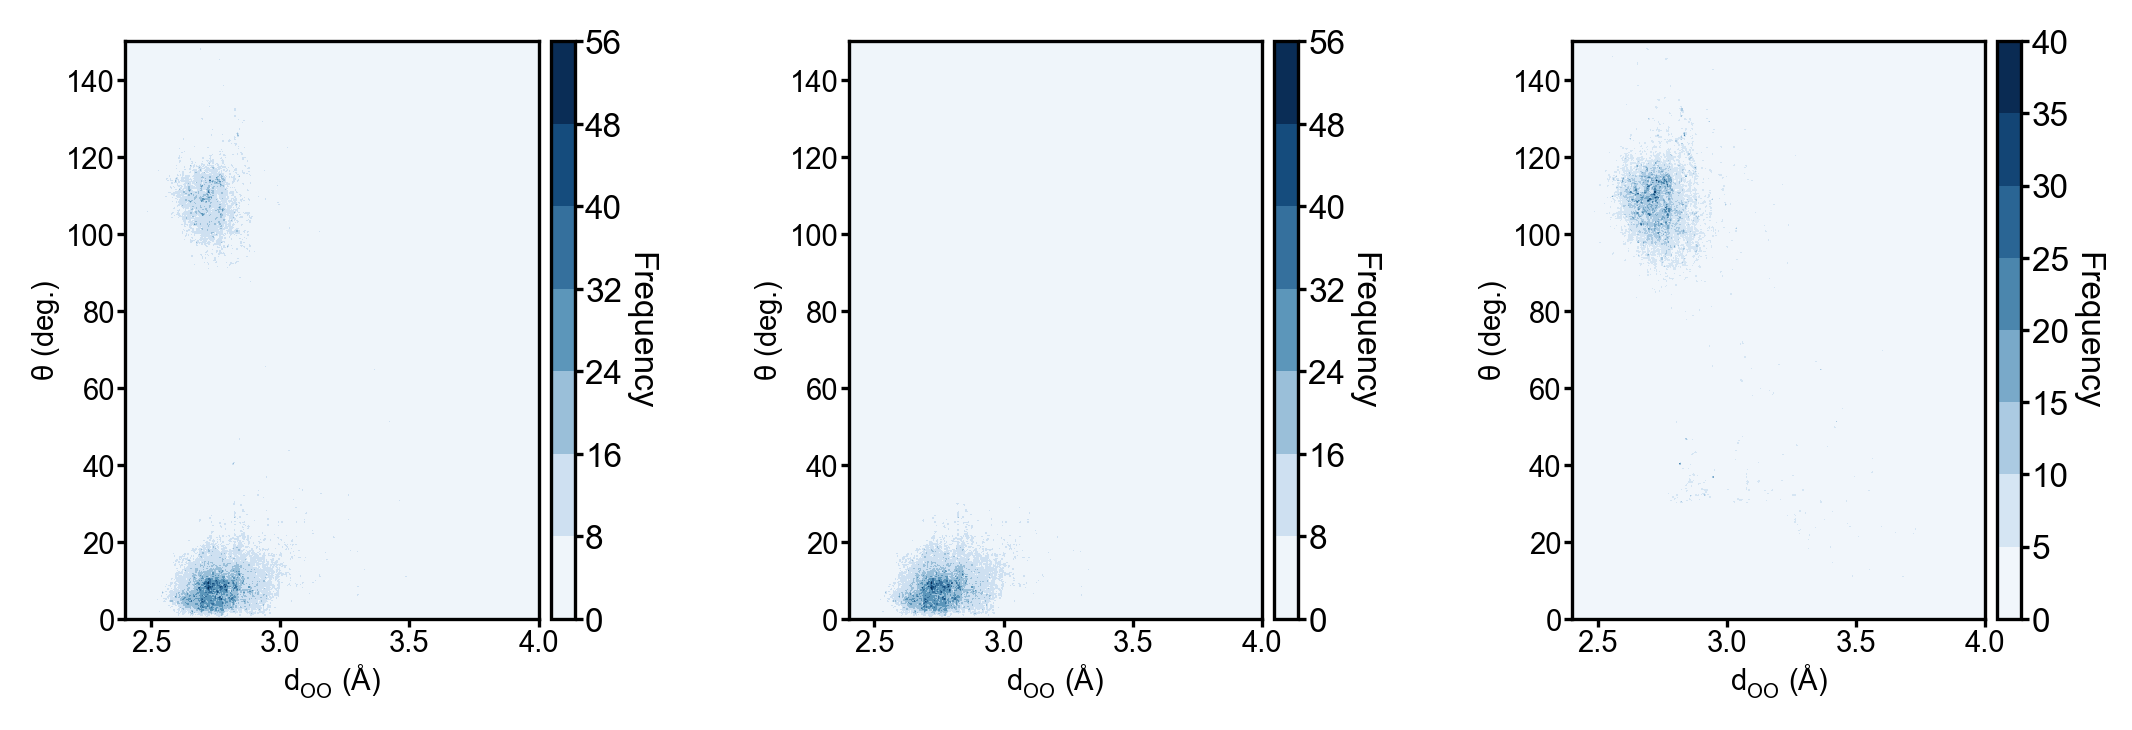

In [17]:
# Define Percentage Calculation Numbers for rCNT

rCNT_heatmap_calc,dOO_edges_calc,theta_edges_calc=np.histogram2d(rCNT_heatmap_df[rCNT_heatmap_keys[0]],
                                                          rCNT_heatmap_df[rCNT_heatmap_keys[1]],
                                                          bins=[d_bins_calc,t_bins_calc],density=False)
f,a=plt.subplots(1,3,dpi=300,figsize=(8,2.5))
plt.subplots_adjust(wspace=0.75)
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')

heatmap_calc_kwargs={'cmap' : Heatmap_CM,'linestyles' : 'dashed' }
cb_a=a[0].contourf(dOO_centers_calc,theta_centers_calc,rCNT_heatmap_calc.T,**heatmap_calc_kwargs)
cb_b=a[1].contourf(dOO_centers_calc,theta_centers_calc,(rCNT_heatmap_calc.T)*mask_calc,**heatmap_calc_kwargs)
cb_f=a[2].contourf(dOO_centers_calc,theta_centers_calc,(rCNT_heatmap_calc.T)*~mask_calc,**heatmap_calc_kwargs)

cb_kwargs={'w' : 0.01,'label' : 'Frequency'}
CNT_F.AddColorBar(cb_a,a[0],f,**cb_kwargs)
CNT_F.AddColorBar(cb_b,a[1],f,**cb_kwargs)
CNT_F.AddColorBar(cb_f,a[2],f,**cb_kwargs)

rCNT_bonded=round(100*np.sum((rCNT_heatmap_calc.T)*mask_calc)/np.sum(rCNT_heatmap_calc.T))
print('rCNT Water: '+str(rCNT_bonded)+'% Bonded')

vCNT Water: 15% Bonded


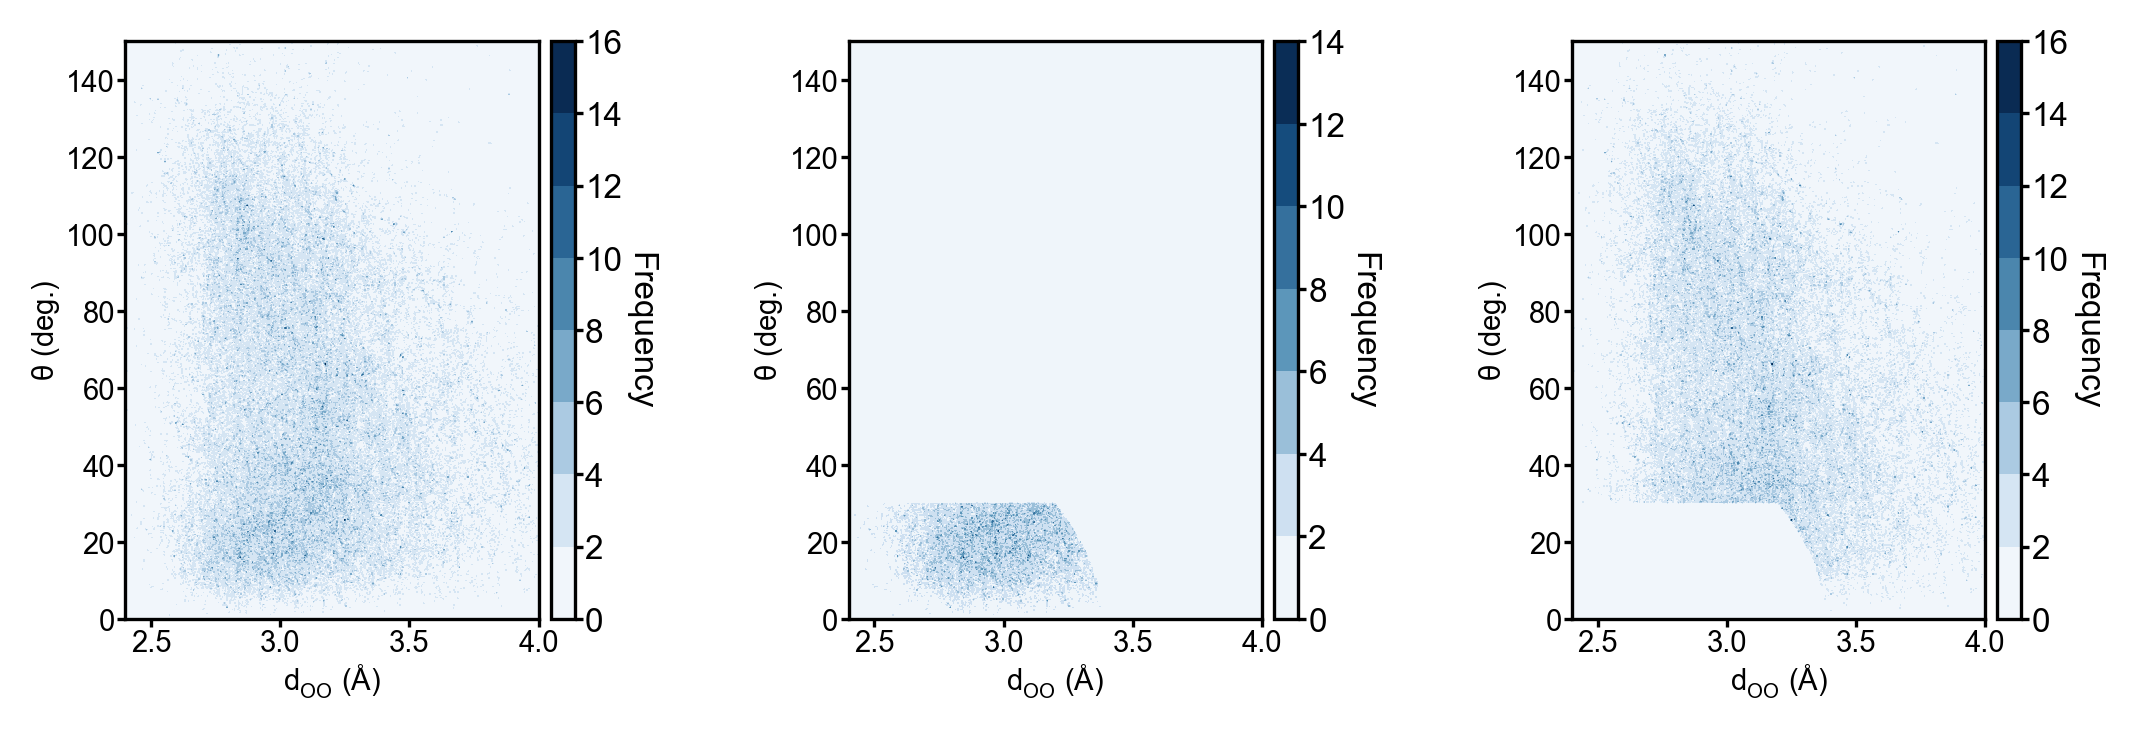

In [18]:
# Define Percentage Calculation Numbers for vCNT

vCNT_heatmap_calc,dOO_edges_calc,theta_edges_calc=np.histogram2d(vCNT_heatmap_df[vCNT_heatmap_keys[0]],
                                                          vCNT_heatmap_df[vCNT_heatmap_keys[1]],
                                                          bins=[d_bins_calc,t_bins_calc],density=False)
f,a=plt.subplots(1,3,dpi=300,figsize=(8,2.5))
plt.subplots_adjust(wspace=0.75)
plt.setp(a,xlim=(2.4,4.0),ylim=(0,150),xlabel=r'd$_\mathrm{OO}$ (Å)',ylabel=r'$\mathrm{\theta}$ (deg.)')

heatmap_calc_kwargs={'cmap' : Heatmap_CM,'linestyles' : 'dashed' }
cb_a=a[0].contourf(dOO_centers_calc,theta_centers_calc,vCNT_heatmap_calc.T,**heatmap_calc_kwargs)
cb_b=a[1].contourf(dOO_centers_calc,theta_centers_calc,(vCNT_heatmap_calc.T)*mask_calc,**heatmap_calc_kwargs)
cb_f=a[2].contourf(dOO_centers_calc,theta_centers_calc,(vCNT_heatmap_calc.T)*~mask_calc,**heatmap_calc_kwargs)

cb_kwargs={'w' : 0.01,'label' : 'Frequency'}
CNT_F.AddColorBar(cb_a,a[0],f,**cb_kwargs)
CNT_F.AddColorBar(cb_b,a[1],f,**cb_kwargs)
CNT_F.AddColorBar(cb_f,a[2],f,**cb_kwargs)

vCNT_bonded=round(100*np.sum((vCNT_heatmap_calc.T)*mask_calc)/np.sum(vCNT_heatmap_calc.T))
print('vCNT Water: '+str(vCNT_bonded)+'% Bonded')

# Molecular Schematic

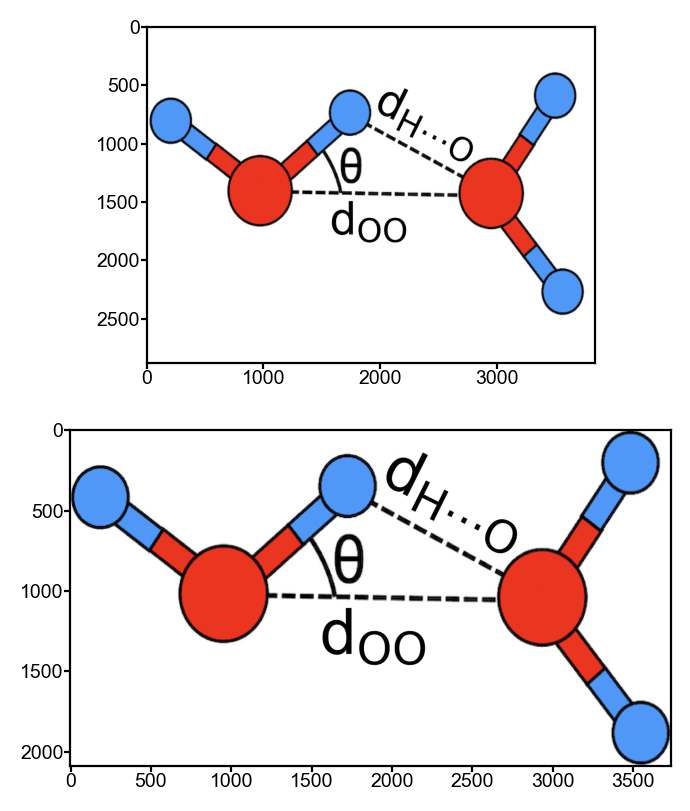

In [19]:
filename=indir+'Data/Schematics/Molecular_Schematic.png'
schematic=Image.open(filename,'r')

f,a=plt.subplots(2,1,dpi=200)
a[0].imshow(schematic)
schematic=schematic.crop((15,385,3750,2475))
a[1].imshow(schematic)

# Figure

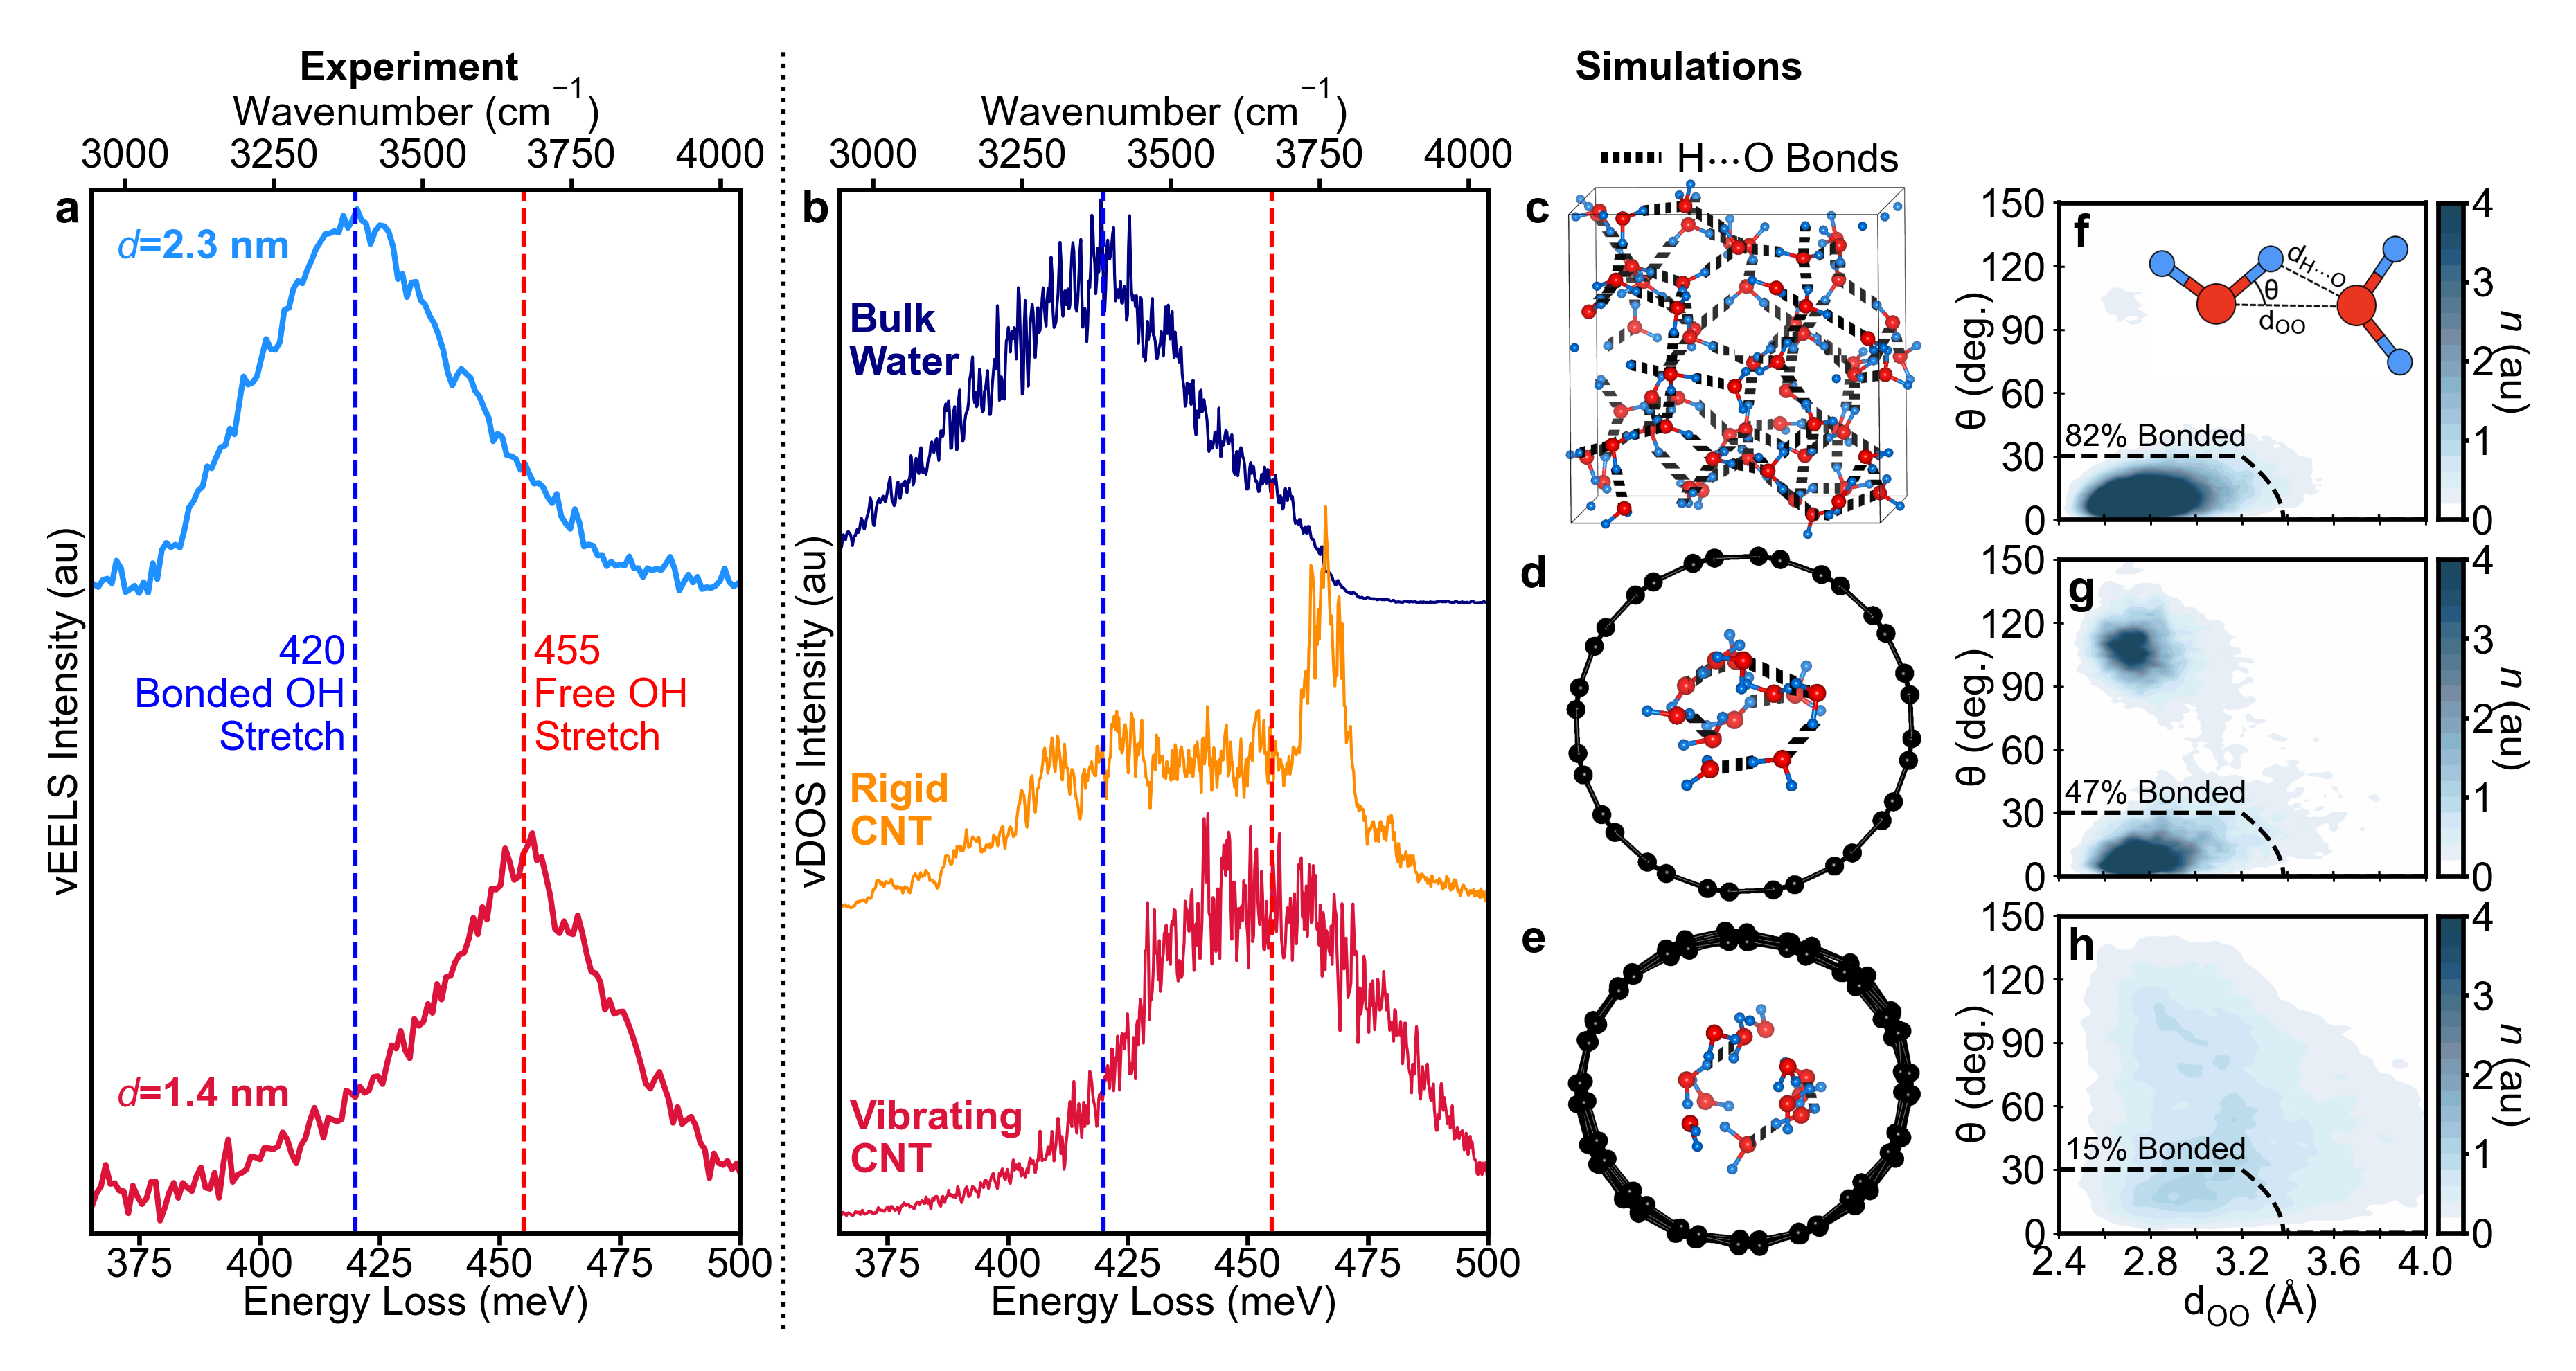

In [20]:
fig=plt.figure(dpi=600,figsize=(6.,3.1))

# Preamble: Experimental and Theoretical Sides of Figure
ax=fig.add_axes([0,0,1,1],xticks=[],yticks=[])
for spine in ax.spines.values(): spine.set_visible(False)

ax.axvline(0.2975,0,0.995,color='k',ls=':')
ax.text(0.1475,0.9925,'Experiment',fontweight='bold',ha='center',va='top',color='k',fontsize=7,transform=ax.transAxes)
ax.text(0.615,0.9925,'Simulations',fontweight='bold',ha='left',va='top',color='k',fontsize=7,transform=ax.transAxes)

# Panel a: vEELS
a_STEM=fig.add_axes([0.02,0.075,0.26,0.81])
plt.setp(a_STEM,xlim=(365,500),ylim=(-0.025,2.65),yticks=[],xticks=[375,400,425,450,475,500])
a_STEM.plot(vEELS_2pt3_E_f,CNT_F.NormArray(vEELS_2pt3_S_f)+1.6,color='DodgerBlue',lw=1)
a_STEM.plot(vEELS_1pt4_E_f,CNT_F.NormArray(vEELS_1pt4_S_f),color='Crimson',lw=1)

a_STEM.text(370,2.55,r'$d$=2.3 nm',ha='left',va='top',fontweight='bold',color='DodgerBlue')
a_STEM.text(370,0.375,r'$d$=1.4 nm',ha='left',va='top',fontweight='bold',color='Crimson')
a_STEM.axvline(420,color='b',ls='--')
a_STEM.axvline(455,color='r',ls='--')
a_STEM.text(418,1.35,'420\nBonded OH\nStretch',color='b',ha='right',va='center')
a_STEM.text(457,1.35,'455\nFree OH\nStretch',color='r',ha='left',va='center')
a_STEM.set_xlabel('Energy Loss (meV)',labelpad=0)
a_STEM.set_ylabel('vEELS Intensity (au)',labelpad=1)

a2=a_STEM.twiny()
a2.set_xlim(365*8.06554,500*8.06554)
a2.set_xlabel(r'Wavenumber (cm$^{-1}$)',labelpad=2)

labels=['a','b','c','d','e','f','g','h']
label_kwargs={'fontsize':8,'fontweight':'bold','ha':'center','va':'top'}
a_STEM.text(-0.0375,1.0,labels.pop(0),**label_kwargs,transform=a_STEM.transAxes)

# Panel b: vDOS
a_DFT=fig.add_axes([0.32,0.075,0.26,0.81],xticks=[375,400,425,450,475,500])
plt.setp(a_DFT,xlim=(365,500),ylim=(-0.025,2.525),yticks=[])
a_DFT.plot(vDOS_bulk_E,CNT_F.NormArray(vDOS_bulk_S)+1.5,color='Navy',lw=0.5)
a_DFT.plot(vDOS_rCNT_E,CNT_F.NormArray(vDOS_rCNT_S)+0.75,color='DarkOrange',lw=0.5)
a_DFT.plot(vDOS_vCNT_E,CNT_F.NormArray(vDOS_vCNT_S),color='Crimson',lw=0.5)

a_DFT.axvline(420,color='b',ls='--',lw=0.75)
a_DFT.axvline(455,color='r',ls='--',lw=0.75)

a_DFT.text(367,2.25,'Bulk\nWater',fontweight='bold',color='Navy',ha='left',va='top')
a_DFT.text(367,1.1,'Rigid\nCNT',fontweight='bold',color='DarkOrange',ha='left',va='top')
a_DFT.text(367,0.3,'Vibrating\nCNT',fontweight='bold',color='Crimson',ha='left',va='top')

a_DFT.set_xlabel('Energy Loss (meV)',labelpad=0)
a_DFT.set_ylabel('vDOS Intensity (au)',labelpad=1)

a2=a_DFT.twiny()
a2.set_xlim(365*8.06554,500*8.06554)
a2.set_xlabel(r'Wavenumber (cm$^{-1}$)',labelpad=2)

a_DFT.text(-0.0375,1.0,labels.pop(0),**label_kwargs,transform=a_DFT.transAxes)

# Panel c-e: MD Snapshots
line=plt.Line2D((0.495,0.515),(0.95,0.95),dashes=[0.6,0.4],linewidth=2,color='k')
label=r'H$⋯$O Bonds'
ax.legend([line],[label],frameon=False,handlelength=1.5,handletextpad=0.35,loc='upper center',bbox_to_anchor=(0.685,0.95))

schem_gs=plt.GridSpec(ncols=1,nrows=3,left=0.6,right=0.765,bottom=0.045,top=0.895,hspace=0)
a_schem=np.array([fig.add_subplot(schem_gs[i],xticks=[],yticks=[]) for i in range(3)]).astype(object)

for ax in a_schem:
    for spine in ax.spines.values():
        spine.set_visible(False)

a_schem[0].imshow(bulk_snapshot)
a_schem[1].imshow(rCNT_snapshot)
a_schem[2].imshow(vCNT_snapshot)

for ax in a_schem:
    ax.text(-0.075,0.965,labels.pop(0),**label_kwargs,transform=ax.transAxes)

# Panel f-g: Heatmaps
heat_gs=plt.GridSpec(ncols=1,nrows=3,left=0.809,right=0.956,bottom=0.075,top=0.875,hspace=0.125)
a_heat=np.array([fig.add_subplot(heat_gs[i],ylabel=r'$\mathrm{\theta}$ (deg.)') for i in range(3)]).astype(object)
plt.setp(a_heat,xlim=(2.4,4.0),ylim=(0,150),xticks=[2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0],yticks=[0,30,60,90,120,150])

heatmaps,bondedpct=[bulk_heatmap_pre,rCNT_heatmap_pre,vCNT_heatmap_pre],[bulk_bonded,rCNT_bonded,vCNT_bonded]
for i in range(3):
    a_heat[i].imshow(heatmaps[i],extent=bulk_heatmap_extent,aspect='auto')
    a_heat[i].plot(dOO_plot_ran,HO_Thresh_Piecewise(dOO_plot_ran),color='k',ls='--')
    a_heat[i].text(0.06,0.965,labels.pop(0),**label_kwargs,transform=a_heat[i].transAxes)
    a_heat[i].text(2.425,32,str(bondedpct[i])+r'% Bonded',fontsize=5.5,ha='left',va='bottom')
    a_heat[i].tick_params(length=1,pad=1.25,width=0.35)
    a_heat[i].yaxis.labelpad=-3

    if i < 2: a_heat[i].set_xticklabels([])
    else: a_heat[i].set_xticklabels([2.4,' ',2.8,' ',3.2,' ',3.6,' ',4.0])

    xy=a_heat[i].get_position()
    cbax=fig.add_axes([xy.x1+0.005,xy.y0,0.01,xy.height],xticks=[],yticks=[0,1,2,3,4])
    cbax.imshow(heatmap_cb,aspect='auto',extent=[0,1,0,4])
    cbax.tick_params(axis='y',left=False,labelleft=False,right=True,labelright=True,length=1)
    cbax.set_ylabel('$n$ (au)',rotation=270,labelpad=-9)

a_heat[2].set_xlabel(r'd$_\mathrm{OO}$ (Å)',labelpad=-1,x=0.52)

# Inset (f): Two Atom Model
axmodel=fig.add_axes([0.845,0.735,0.106,0.12],xticks=[],yticks=[])
for spine in axmodel.spines.values():spine.set_visible(False)
axmodel.imshow(schematic,aspect=0.95)